In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bar_chart_race as bcr

## Оценка динамики изменения цены по районам

##### Создаем список с датами для загрузки файлов и два пустых датафрейма. Первый для медианных значений цены, второй для количества объявлений в группе.

In [2]:
dates = ['221223','060124','220224','220324', '220424', '240524', '230624', '240724', '230824', '210924']
new_dates = ['2023-12-22', '2024-01-06', '2024-02-22', '2024-03-22', '2024-04-22', '2024-05-24', '2024-06-23', '2024-07-24', '2024-08-23', '2024-09-21']
df_pivot_median = pd.DataFrame(columns=dates)
df_pivot_count = pd.DataFrame(columns=dates)

##### Проходимся по списку с датами, поочередно загружаем файлы.

- Добавляем новую колонку с разбивкой на группы в зависимости от площади квартиры
- Группируем по площади и региону, считаем медианное значение и количество объявлений в группе
- Собираем сводную таблицу df_pivot_median с медианными значения

In [3]:

for date in dates:
    df = pd.read_csv(rf'D:\Ela\flats_Yerevan\flats_yerevan_{date}_red.csv', sep=";") # считываем данные
                                                             # добавляем новую колонку с разбивкой по площади
    df = df.drop_duplicates()
    df['cut_square'] = pd.cut(df['square'], bins= [59, 70, 80, 90, 100], labels=['60-70', '70-80', '80-90', '90-100']) 
    add_metod = {'cost': [ 'median', 'count']}              # задаем функции которые будут рассчитыватся после группировки
    df_stut = df.groupby(['region','cut_square']).agg(add_metod).round(1).reset_index() # группируем дынные
    df_stut.columns = ['_'.join(col).rstrip('_') for col in df_stut.columns.values]     # редактируем название столбцов
    df_pivot_median[date] = df_stut['cost_median']     # добавляем рассчитынные медиальные значения в df_pivot_median      
    df_pivot_count[date] = df_stut['cost_count']       # добавляем количество объявлений в df_pivot_count
df_pivot_median.insert(0, 'region', df_stut['region']) # вставляем в df_pivot_median столбец с названием регионов
df_pivot_median.insert(1, 'cut_square', df_stut['cut_square']) # вставляем в df_pivot_median столбец с разбивкой по площади
df_pivot_count.insert(0, 'region', df_stut['region'])  # вставляем в df_pivot_count столбец с названием регионов
df_pivot_count.insert(1, 'cut_square', df_stut['cut_square']) # вставляем в df_pivot_count столбец с разбивкой по площади

In [4]:
df_pivot_median.head(4)

,region,cut_square,221223,060124,220224,220324,220424,240524,230624,240724,230824,210924
0,Аван,60-70,280000.0,281750.0,266625.0,280000.0,300000.0,276500.0,250000.0,270000.0,280000.0,250000.0
1,Аван,70-80,300000.0,300000.0,285000.0,280000.0,300000.0,300000.0,260000.0,275000.0,280000.0,260000.0
2,Аван,80-90,310000.0,300000.0,283500.0,280000.0,300000.0,300000.0,300000.0,300000.0,290000.0,300000.0
3,Аван,90-100,350000.0,380000.0,364500.0,330000.0,370000.0,330000.0,350000.0,330000.0,320000.0,320000.0


In [5]:
df_pivot_count.head(4)

,region,cut_square,221223,060124,220224,220324,220424,240524,230624,240724,230824,210924
0,Аван,60-70,34,46,40,40,25,28,38,44,39,49
1,Аван,70-80,14,23,18,15,18,23,24,28,38,30
2,Аван,80-90,18,26,25,19,17,26,37,46,30,28
3,Аван,90-100,16,25,17,25,19,21,23,46,32,33


##### Строим гистограмму с распределением количества значений в зависимости от района

<Axes: title={'center': 'Распределение количества объявлений по району'}, xlabel='Район', ylabel='Количество'>

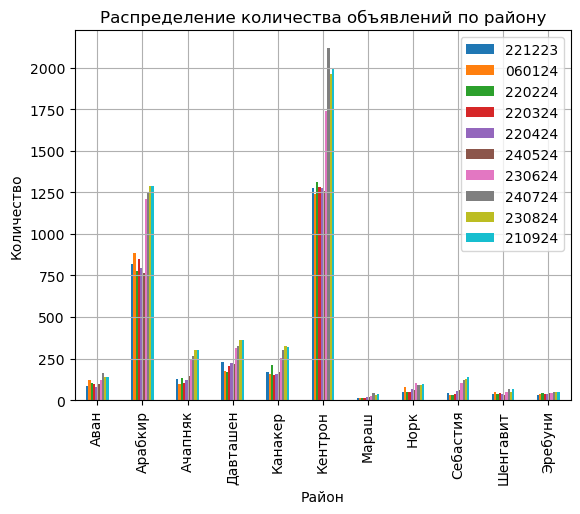

In [6]:
# считаем количество объявлений по районам без разбивки по площади
count= df_pivot_count.groupby('region')[dates].sum().reset_index()

count[count.columns.tolist()].plot(x='region', 
                                   kind='bar', 
                                   title='Распределение количества объявлений по району', 
                                   xlabel='Район', ylabel='Количество',
                                   grid=True)

### Задаем площадь по которой будет отстраиваться визуализация

In [7]:
square = '60-70'

#### Подготовливаем данные для визуализации данных с помощью библиотеки bar_chart_race

In [8]:
df2 = df_pivot_median.copy()                   # Создаем копию датафрейма
                                               # Заменяем название колонок                                        
df2.columns=['date', 'cut_square'] + new_dates
                                               # Выбираем колонки с датами
df_bar_char = df2[df2['cut_square']==square][['date'] + new_dates]
df_bar_char.set_index('date', inplace = True)     # Задаем название столбцу с индексами
df_bar_char_transp = df_bar_char.transpose()         # Транспонируем таблицу 
df_bar_char_transp                                # Выводим результат

date,Аван,Арабкир,Ачапняк,Давташен,Канакер,Кентрон,Мараш,Норк,Себастия,Шенгавит,Эребуни
2023-12-22,280000.0,400000.0,300000.0,364500.0,430000.0,450000.0,300000.0,280000.0,280000.0,300000.0,300000.0
2024-01-06,281750.0,370000.0,300000.0,350000.0,400000.0,445500.0,300000.0,295000.0,300000.0,300000.0,280000.0
2024-02-22,266625.0,364500.0,300000.0,330000.0,380000.0,450000.0,370000.0,280000.0,280000.0,300000.0,320000.0
2024-03-22,280000.0,364500.0,300000.0,300000.0,380000.0,450000.0,364500.0,300000.0,275000.0,300000.0,300000.0
2024-04-22,300000.0,351000.0,300000.0,306000.0,380000.0,429000.0,320000.0,280000.0,260000.0,285000.0,300000.0
2024-05-24,276500.0,350000.0,300000.0,300000.0,390000.0,429000.0,350000.0,290000.0,300000.0,255000.0,280000.0
2024-06-23,250000.0,350000.0,300000.0,300000.0,390000.0,420000.0,300000.0,250000.0,300000.0,270000.0,265000.0
2024-07-24,270000.0,350000.0,300000.0,312000.0,390000.0,429000.0,330000.0,280000.0,280000.0,280000.0,300000.0
2024-08-23,280000.0,350000.0,300000.0,311000.0,360000.0,429000.0,300000.0,270000.0,280000.0,280000.0,299500.0
2024-09-21,250000.0,350000.0,300000.0,300000.0,350000.0,429000.0,320000.0,280000.0,270000.0,280000.0,280000.0


### Строим видеограмму bar_chart_race с изменением медианной цены за период наблюдения 

In [12]:
bcr.bar_chart_race(
    df=df_bar_char_transp,                    # Задаем массив с данными
    # filename= rf'D:\Ela\flats_Yerevan\flats_yerevan{square}_изменением медианной цены.mp4',  # Сохраняем в файл
    title=f'Изменение медианной цены на квартиру, площадь {square} кв.м.',   # Задаем заголовок
    title_size='smaller',                  # Задаем размер заголовка
    bar_label_size=7, 
    tick_label_size=7,
    orientation='v',                       # Задаем ориентацию 
    sort='desc',                           # Задаем сортировку значений 
    fixed_max=True,                        # Фиксируем максимальное значение
    perpendicular_bar_func='mean',         # Задаем функцию которая отображается серой линией (среднее значение)
    steps_per_period=5, 
    period_length=4000
)

C:\anaconda\Lib\site-packages\bar_chart_race\_make_chart.py:294: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.df_values.columns, ha='right')
C:\anaconda\Lib\site-packages\bar_chart_race\_make_chart.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([max_val] * len(ax.get_yticks()))
C:\anaconda\Lib\site-packages\bar_chart_race\_make_chart.py:260: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=30)


## Построение обобщенного дашборда с основными характеристиками цен

##### Создаем список значений для для диаграммы boxplot

In [13]:
vals = []
df_in_date = df[df['cut_square']==square]
names = list(df_in_date['region'].unique()) # выбираем уникальные названия регионов
for col in names: 
    vals.append(df_in_date[df_in_date['region']== col]['cost'].values) # выбираем из датафрейма все значения с указанной площадью и формируем список

##### Строим дашборд

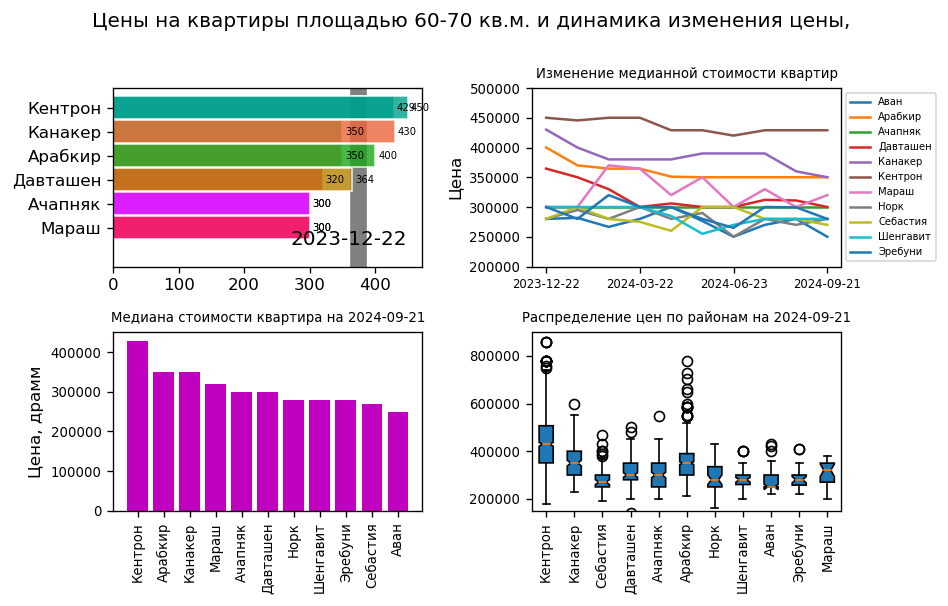

In [15]:
from matplotlib import dates
fig, ax_array = plt.subplots(2, 2, figsize=(8, 5), dpi=120, tight_layout=True)
ax1, ax2, ax3, ax4 = ax_array.flatten()
fig.suptitle(f'Цены на квартиры площадью {square} кв.м. и динамика изменения цены, ', y=1)

ax2.plot(df_bar_char_transp)
ax2.set_title('Изменение медианной стоимости квартир', fontsize=8)
ax2.set_ylabel('Цена', size=10)
ax2.legend(df_bar_char_transp.columns, fontsize=6, bbox_to_anchor=(1,1))
ax2.xaxis.set_major_locator(dates.DayLocator([1, 4, 7, 10]))
ax2.set_ylim([200000, 500000])              # Задаем макс. и мин. значения шкалы
ax2.tick_params('y', labelsize=8)           # Задаем размер значений шкалы У
ax2.tick_params('x', labelsize=7)           # Задаем размер значений шкалы Х

bar = df_bar_char[new_dates[-1]].sort_values(ascending=False) # new_dates[-1] это дата последнего файла
ax3.bar(bar.index, bar, color = 'm')
ax3.set_ylabel('Цена, драмм',  size=10)
ax3.tick_params(axis='x', which='major', labelsize=8, rotation=90) # Настройка вида подписи оси
ax3.tick_params('y', labelsize=8) 
ax3.set_title(f'Медиана стоимости квартира на {new_dates[-1]}', fontsize=8)

ax4.boxplot(vals, labels=names, patch_artist=True, notch='True')
ax4.tick_params(axis='x', labelsize=8, rotation=90) # Настройка вида подписи оси
ax4.set_ylim([150000, 900000]) 
ax4.tick_params('y', labelsize=8) 
ax4.set_title(f'Распределение цен по районам на {new_dates[-1]}', fontsize=8)



bcr.bar_chart_race((df_bar_char_transp/1000), 
                   #filename= rf'D:\Ela\flats_Yerevan\flats_yerevan{square}.mp4', # Сохраняем в файл
                   title_size='smaller', n_bars=6, bar_label_size=6, 
                   tick_label_size=2, fixed_max=True, perpendicular_bar_func='mean',
                   steps_per_period=5, 
                   period_length=1500, fig=fig)


 ##  Оценка стоимости квартир в одном районе в зависимости от размера площади

### Задаем район

In [16]:
region = 'Давташен'

##### Выбираем данные по заданному району из общей таблицы

In [17]:
df = df.sort_values('cut_square')                    # Сортируем данные по площади
df_region = df[df['region']== region]               # ВЫбираем регион по которому хотим провети анализ
df_region.head(3)

,number,region,cost,value,rooms,square,information,link,cut_square
3603,20918117,Давташен,300000.0,֏,2,65,"300,000 ֏ в месяц, Давташен, 2 ком., 65 кв.м.,...",https://www.list.am/ru/item/20918117,60-70
1492,21246831,Давташен,350000.0,֏,2,64,"350,000 ֏ в месяц, Давташен, 2 ком., 64 кв.м.,...",https://www.list.am/ru/item/21246831,60-70
1514,21246839,Давташен,350000.0,֏,2,70,"350,000 ֏ в месяц, Давташен, 2 ком., 70 кв.м.,...",https://www.list.am/ru/item/21246839,60-70


##### Создаем из исходной таблицы новую, в которой цены из объявлений разбиты на серии в зависимости от площади квартиры

In [18]:
vals, xs = [],[]                          # Создаем два списка. Первый для значений цены, второй для дрожания(смещения) точек.
sguares = list(df['cut_square'].unique()) # Выбираем уникальные значения разбивки площади, которые будут название колонок
i = 0
for col in sguares: 
    vals.append(df_region[df_region['cut_square']== col]['cost'].values) # Выбираем из датафрейма все значения с указанной площадью и добавляем в vals
    xs.append(np.random.normal(i + 1, 0.04, len(vals[i])))         # Задаем дрожания(смещения) точек.
    i += 1


##### В итоге получается таблица:

In [19]:
df_region2 = pd.DataFrame(vals, index=sguares).transpose()
df_region2.head(2)


,60-70,70-80,80-90,90-100
0,300000.0,468000.0,330000.0,300000.0
1,350000.0,250000.0,320000.0,270000.0


##### Строим графики распределения цен boxplot в зависимости от площадей квартир

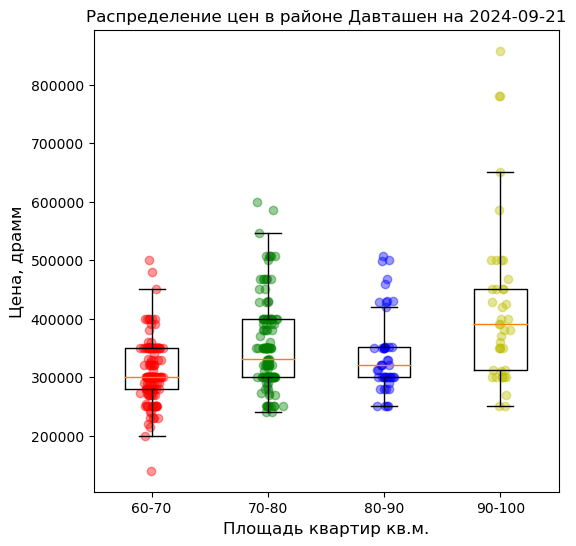

In [20]:
plt.figure(figsize=(6, 6))                                # Размер графика
plt.boxplot(vals, labels=sguares, showfliers=False)
palette = ['r', 'g', 'b', 'y']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)

plt.xlabel('Площадь квартир кв.м.', size=12)              #Подпись для оси х
plt.ylabel('Цена, драмм', size=12)                        #Подпись для оси y
plt.title(f'Распределение цен в районе {region} на {new_dates[-1]}')                                    #Название
plt.show()

## Динамика изменения цен на квартиры в одном районе в зависимости от площади

### Задаем район

In [21]:
plase = ['Давташен', 'Давидашен']

##### Создаем 4 пустых датафрейма с разбивкой по площади, в которые будем собирать данные из разных таблиц 

In [22]:
# Задаем даты в которые были загруженны данные
dates = ['221223','060124','220224','220324', '220424', '240524', '230624', '240724', '230824', '210924']

df_60_70 = pd.DataFrame()
df_70_80 = pd.DataFrame()
df_80_90 = pd.DataFrame()
df_90_100 = pd.DataFrame()

In [23]:

for date in dates:    
    df = pd.read_csv(rf'D:\Ela\flats_Yerevan\flats_yerevan_{date}_red.csv', sep=";") # считываем данные
    # добавляем новую колонку с разбивкой по площади
    df['cut_square'] = pd.cut(df['square'], bins= [59, 70, 80, 90, 100], labels=['60-70', '70-80', '80-90', '90-100']) 
    df = df.sort_values('cut_square')            # Сортируем данные по площади
    vals = []                                    # Создаем список в который будем добавлять значения цены в зависимости от площади
    df_region = df[df['region'].isin(plase)]        # !!!!! ПОМЕНЯЛСЯ РЕГИОН Выбираем объявления из заданного района.
    names = list(df_region['cut_square'].unique()) # выбираем уникальные значения разбивки площади, по которым потом будем строить график
    for col in names: 
        vals.append(df_region[df_region['cut_square']== col]['cost'].values) # выбираем из датафрейма все значения с указанной площадью и формируем список
    df_region_cut = pd.DataFrame(vals, index=names).transpose()
    df_60_70 = df_60_70.join(pd.DataFrame(vals[0], columns=[date]), how='outer')
    df_70_80 = df_70_80.join(pd.DataFrame(vals[1], columns=[date]), how='outer')
    df_80_90 = df_80_90.join(pd.DataFrame(vals[2], columns=[date]), how='outer')
    df_90_100 = df_90_100.join(pd.DataFrame(vals[3], columns=[date]), how='outer')

##### Пример итоговая таблица для выбранного района  площадью 60-70 кв.м.:

In [24]:
df_60_70

,221223,060124,220224,220324,220424,240524,230624,240724,230824,210924
0,400000.0,300000.0,270000.0,320000.0,330000.0,214500.0,450000.0,250000.0,300000,300000.0
1,360000.0,250000.0,250000.0,250000.0,300000.0,400000.0,230000.0,350000.0,400000,350000.0
2,364500.0,400000.0,400000.0,410000.0,320000.0,300000.0,400000.0,170000.0,600000,350000.0
3,330000.0,330000.0,400000.0,280000.0,295000.0,260000.0,400000.0,300000.0,330000,250000.0
4,364500.0,390000.0,324000.0,300000.0,300000.0,234000.0,468000.0,330000.0,350000,300000.0
...,...,...,...,...,...,...,...,...,...,...
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450000,NaN
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320000,NaN
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320000,NaN
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300000,NaN


### Строим графики динамики изменения цен на квартиры

##### Давиташен, площадь 60-70

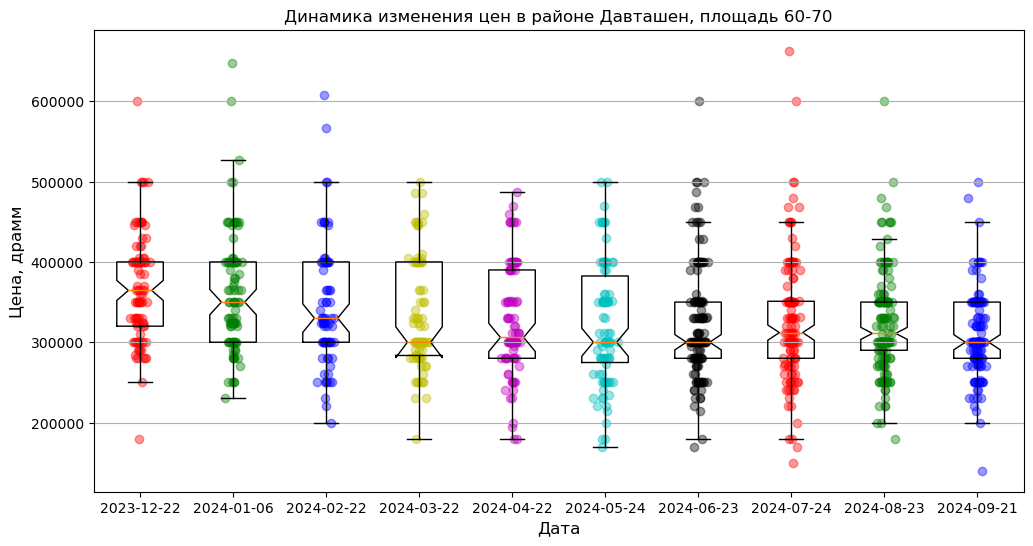

In [25]:
vals, xs = [],[]
df_60_70.columns = new_dates
names = list(list(df_60_70.columns))
i = 0
for col in names:
    s = df_60_70[col].values
    s = s[np.isfinite(s)]                                   # Удаляем пустые значения
    vals.append(s)
    xs.append(np.random.normal(i + 1, 0.04, len(vals[i])))  # Задаем дрожания(смещения) точек.
    i += 1

plt.figure(figsize=(12, 6))                                  # Задаем размер графика
plt.boxplot(vals, labels=names, showfliers=False, notch=True, widths=0.5 )
palette = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'r', 'g', 'b', 'y' ]               # Задаем палитру цветов точек
for x, val, c in zip(xs, vals, palette):        
    plt.scatter(x, val, alpha=0.4, color=c)                 #Отстраиваем точки с ценами
plt.xlabel('Дата', size=12)                                 #Подпись для оси х
plt.ylabel('Цена, драмм', size=12)                          #Подпись для оси y
plt.title(f'Динамика изменения цен в районе {region}, площадь 60-70')                       #Название
plt.grid(axis='y')
plt.show()

##### площадь 70-80

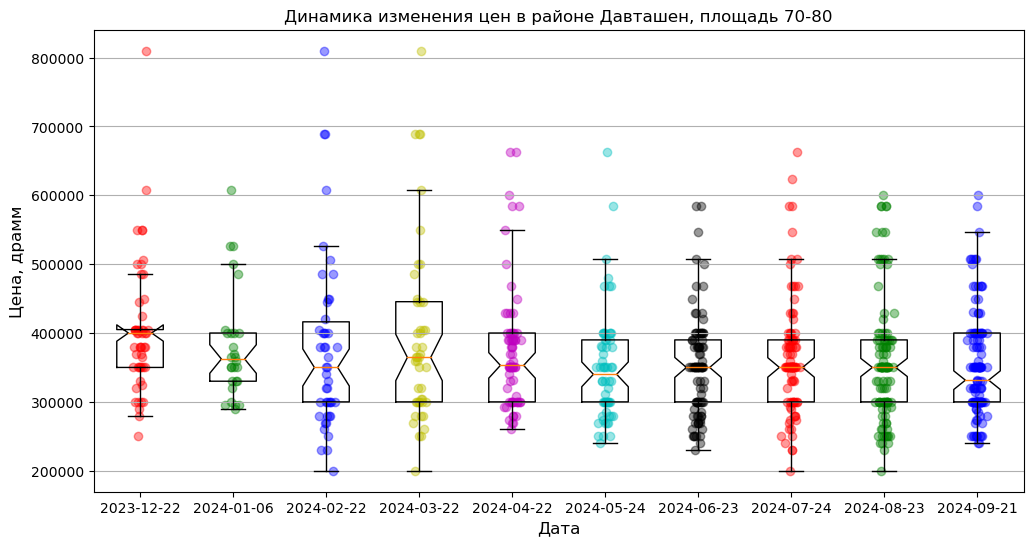

In [26]:
vals, xs = [],[]
df_70_80.columns = new_dates
names = list(list(df_70_80.columns))
i = 0
for col in names:
    s = df_70_80[col].values
    s = s[np.isfinite(s)]                                   # Удаляем пустые значения
    vals.append(s)
    xs.append(np.random.normal(i + 1, 0.04, len(vals[i])))  # Задаем дрожания(смещения) точек.
    i += 1

plt.figure(figsize=(12, 6))                                  # Задаем размер графика
plt.boxplot(vals, labels=names, showfliers=False, notch=True, widths=0.5 )
palette = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'r', 'g', 'b', 'y']               # Задаем палитру цветов точек
for x, val, c in zip(xs, vals, palette):        
    plt.scatter(x, val, alpha=0.4, color=c)                 #Отстраиваем точки с ценами
plt.xlabel('Дата', size=12)                                 #Подпись для оси х
plt.ylabel('Цена, драмм', size=12)                          #Подпись для оси y
plt.title(f'Динамика изменения цен в районе {region}, площадь 70-80')                       #Название
plt.grid(axis='y')
plt.show()


##### площадь 80-90

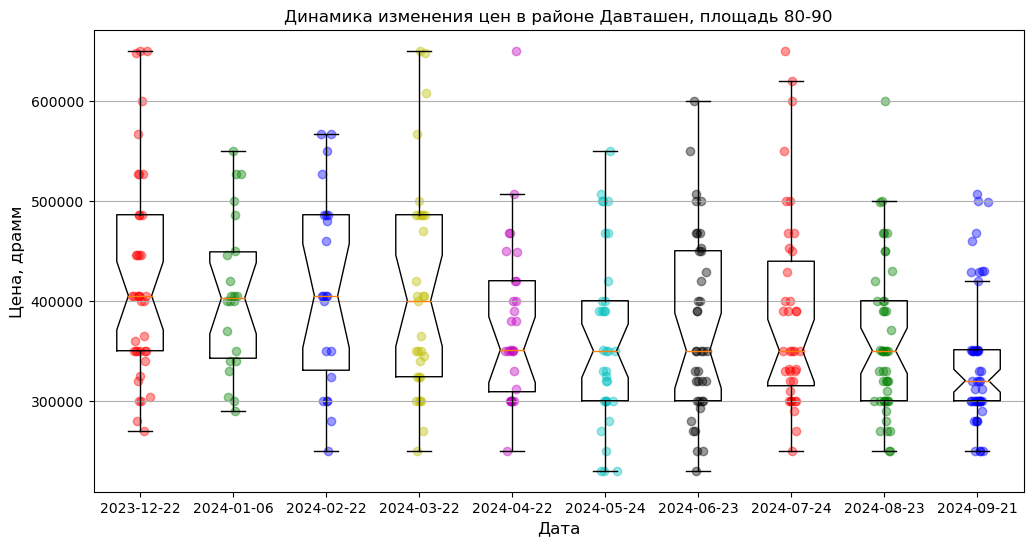

In [29]:
vals, xs = [],[]
df_80_90.columns = new_dates
names = list(list(df_80_90.columns))
i = 0
for col in names:
    s = df_80_90[col].values
    s = s[np.isfinite(s)]                                   # Удаляем пустые значения
    vals.append(s)
    xs.append(np.random.normal(i + 1, 0.04, len(vals[i])))  # Задаем дрожания(смещения) точек.
    i += 1

plt.figure(figsize=(12, 6))                                  # Задаем размер графика
plt.boxplot(vals, labels=names, showfliers=False, notch=True, widths=0.5 )
palette = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'r', 'g', 'b', 'y']               # Задаем палитру цветов точек
for x, val, c in zip(xs, vals, palette):        
    plt.scatter(x, val, alpha=0.4, color=c)                 #Отстраиваем точки с ценами
plt.xlabel('Дата', size=12)                                 #Подпись для оси х
plt.ylabel('Цена, драмм', size=12)                          #Подпись для оси y
plt.title(f'Динамика изменения цен в районе {region}, площадь 80-90')                       #Название
plt.grid(axis='y')
plt.show()

#####  площадь 90-100

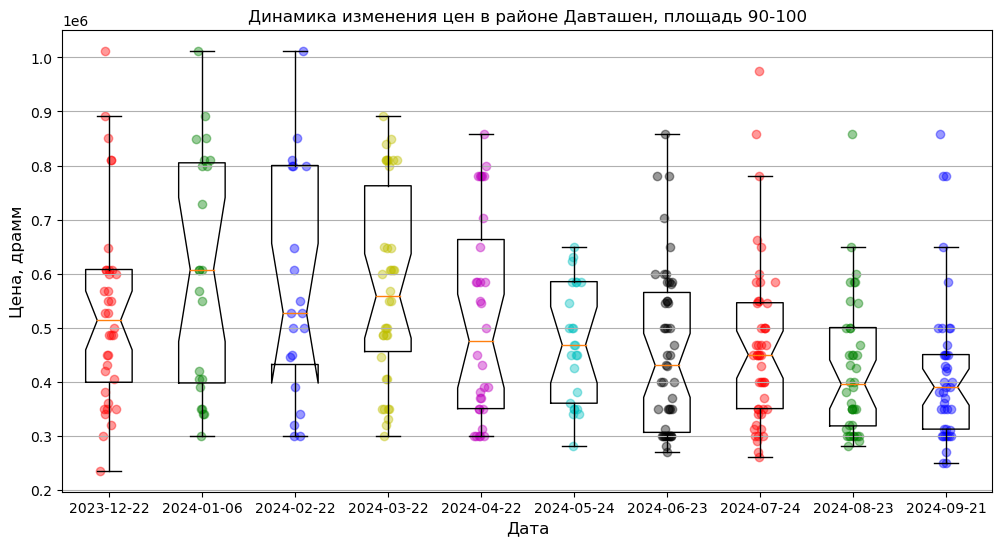

In [32]:
vals, xs = [],[]
df_90_100.columns = new_dates
names = list(list(df_90_100.columns))
i = 0
for col in names:
    s = df_90_100[col].values
    s = s[np.isfinite(s)]                                   # Удаляем пустые значения
    vals.append(s)
    xs.append(np.random.normal(i + 1, 0.04, len(vals[i])))  # Задаем дрожания(смещения) точек.
    i += 1

plt.figure(figsize=(12, 6))                                  # Задаем размер графика
plt.boxplot(vals, labels=names, showfliers=False, notch=True, widths=0.5 )
palette = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'r', 'g', 'b', 'y']               # Задаем палитру цветов точек
for x, val, c in zip(xs, vals, palette):        
    plt.scatter(x, val, alpha=0.4, color=c)                 #Отстраиваем точки с ценами
plt.xlabel('Дата', size=12)                                 #Подпись для оси х
plt.ylabel('Цена, драмм', size=12)                          #Подпись для оси y
plt.title(f'Динамика изменения цен в районе {region}, площадь 90-100')                       #Название
plt.grid(axis='y')
plt.show()